In [1]:
import os
from typing import List

import numpy as np
import pandas as pd
from umap import UMAP
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.animation import FuncAnimation

/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
encoder_name = "uni"

data_dir = os.path.join("..", "data", "embeddings", "val", encoder_name)

os.path.isdir(data_dir)

True

In [3]:
base_path = os.path.join(data_dir, "base.parquet")

base = pd.read_parquet(base_path)

base.head()

,image,label,embedding
0,"[0.8784314, 0.9372549, 0.9019608, 0.827451, 0....",1,"[-0.55222267, -0.20488673, 0.9180498, 1.506877..."
1,"[0.41568628, 0.4392157, 0.32941177, 0.47058824...",1,"[-0.51022464, -0.74803203, -0.35038134, 1.5119..."
2,"[0.6745098, 0.75686276, 0.48235294, 0.59607846...",1,"[-2.0709505, 1.4726572, 2.4636905, 0.83705497,..."
3,"[0.94509804, 0.9019608, 0.83137256, 0.7411765,...",1,"[-0.5812537, 0.8570826, -1.2839988, 1.5515367,..."
4,"[0.61960787, 0.9137255, 1.0, 0.627451, 0.92156...",1,"[-1.0645293, 0.21595623, 1.1151943, 0.26929492..."


In [7]:
brightness_path = os.path.join(data_dir, "brightness-0.0.parquet")

brightness = pd.read_parquet(brightness_path)

brightness.head()

,image,label,embedding
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[-0.19493383, 0.54913247, -0.43006384, 0.10397..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[-0.19493383, 0.54913247, -0.43006384, 0.10397..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[-0.19493383, 0.54913247, -0.43006384, 0.10397..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[-0.19493383, 0.54913247, -0.43006384, 0.10397..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[-0.19493383, 0.54913247, -0.43006384, 0.10397..."


In [18]:
brightness.iloc[0]["embedding"].shape

(1024,)

In [5]:
test = base["image"][1].reshape(3, 96, 96)

test = test.transpose(1,2,0)

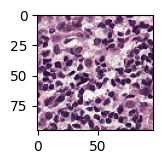

In [6]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(test)
plt.show()

In [36]:
test = brightness["image"][0].reshape(3, 96, 96)

test = test.transpose(1,2,0)

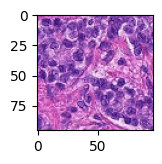

In [37]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(test)
plt.show()

In [27]:
def plot_embeddings(
    embeddings: List[np.ndarray],
    labels: List[str],
    dataset: str,
    save_dir: str,
    seed: int,
    ):

    embeddings = np.array(embeddings)

    umap = UMAP(n_components=2, random_state=seed)
    projections = umap.fit_transform(embeddings)

    fig = px.scatter(
        projections, x=0, y=1,
        color=labels, labels={"color": "label"},
        color_discrete_sequence=px.colors.qualitative.Prism
    )
    fig.write_image(os.path.join(save_dir, f"{dataset}-embeddings.png"))

In [32]:
save_dir = os.path.join("..", "assets", "embedding-vis", "val", encoder_name)
os.makedirs(save_dir, exist_ok=True)

plot_embeddings(
    base["embedding"].tolist(), 
    labels=base["label"].map(str).tolist(), 
    dataset="base", 
    save_dir=save_dir, 
    seed=42
    )

/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/ericmonzon/mambaforge/envs/histology/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

